In [1]:
from config import api_key
import pandas as pd
import numpy as np
import requests 
import brewerydb as br
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
#%matplotlib notebook

In [3]:
beer_data = pd.read_csv('data/beers.csv')
brew_data = pd.read_csv('data/brewery_data.csv')
print(beer_data.head())
print(brew_data.head())

brew_data_s = brew_data[['Brewery ID','Brewery Name']]
brew_data_s['brewery_id'] = brew_data_s['Brewery ID']

   Unnamed: 0 beer_id                       name               display_name  \
0           0  c4f2KE           'Murican Pilsner           'Murican Pilsner   
1           1  zTTWa2                11.5° PLATO                11.5° PLATO   
2           2  zfP2fK              12th Of Never              12th Of Never   
3           3  xwYSL2       15th Anniversary Ale       15th Anniversary Ale   
4           4  UJGpVS  16 So Fine Red Wheat Wine  16 So Fine Red Wheat Wine   

    abv   ibu  style_id  year  glass_id organic brewery_id retired    status  \
0   5.5  32.5      98.0   NaN       4.0       N     nHLlnK       N  verified   
1   4.5  35.0     164.0   NaN       NaN       N     nHLlnK       N  verified   
2   5.5  45.0      25.0   NaN       NaN       N     nLsoQ9       N  verified   
3   NaN  37.5       5.0   NaN       NaN       N     TMc6H2       N  verified   
4  11.0  65.0      35.0   NaN       NaN       N     TMc6H2       N  verified   

   ingredients              hops      malt m

C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
beerbrewed = pd.merge(beer_data,brew_data_s,how = 'left',on=['brewery_id'])

In [30]:
beerbrewed['short_name'] =beerbrewed['Brewery Name'].str.split(n=1,expand=True)[0]
beerbrewed['short_name'] = beerbrewed['short_name'].replace('New','New Holland')
beerbrewed['short_name'] = beerbrewed['short_name'].replace('Zero','Zero Gravity')
beerbrewed['short_name'] = beerbrewed['short_name'].replace('Laughing','Laughing Dog')
beerbrewed['short_name'] = beerbrewed['short_name'].replace('Sierra','Sierra Nevada')

In [31]:
bb =beerbrewed['short_name'].value_counts()
x_axis = np.arange(len(bb))


([<matplotlib.axis.XTick at 0x2378e6cf588>,
 <a list of 17 Text xticklabel objects>)

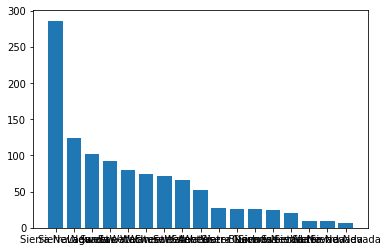

In [32]:
plt.bar(x_axis,bb)
xlabel = beerbrewed['short_name']
plt.xticks(np.arange(17),xlabel)


In [ ]:
bb[0:7].values

In [70]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

def image_plot(heights, images, spacing=0,width = 200):
    # Iterate through images and data, autoscaling the width to
    # the aspect ratio of the image
    for i, (height, img) in enumerate(zip(heights, images)):
        AR = img.shape[1] / img.shape[0]
        #width = 200 #height * AR
        left = width*i + spacing*i
        right = left + width
        plt.imshow(img, extent=[left, right, 0, height])
    # Set x,y limits on plot window
    plt.xlim(0, right)
    plt.ylim(0, max(heights)*1.1)

In [78]:
sierraNevada = imread('Images/sierraNevada.jpg')
inbev = imread('Images/inbev.jpg').swapaxes(0, 1)
oskar = imread('Images/oskarBrew.jpg')
jack = imread('Images/jack.png')
lagun = imread('Images/lagun.png')
nH = imread('Images/newHolland.jpg')
sweet = imread('Images/sweetwater.jpg')
zero = imread('Images/zero.png')
wach = imread('Images/wach.jpg')
port = imread('Images/port.jpg')

C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after remov

In [16]:
images = [sierraNevada, oskar, nH, lagun, sweet, jack, inbev]
brew_names = bb[0:7].index.str.split(n=1,expand=True)[0]
brew_names

'Sierra'

In [33]:
xt = np.arange(100, 1400,200)
xl = bb.index[0:7]



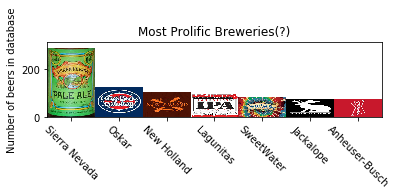

In [71]:
image_plot(bb[0:7].values,images)
plt.xticks(xt,xl,rotation=-45)
plt.ylabel('Number of beers in database')
plt.title('Most Prolific Breweries(?)')
plt.savefig('Images/prolific.png')
#plt.xticks()

In [68]:
hops_per = round(beerbrewed.groupby('short_name').count()['hops'].divide(1/100*beerbrewed.groupby('short_name').count()['beer_id']),1)
hops_per = hops_per.sort_values(ascending = False)
ing_per = round(beerbrewed.groupby('short_name').sum()['ingredients'].divide(beerbrewed.groupby('short_name').count()['beer_id']),2)
ing_per = ing_per.sort_values(ascending = False)


Index(['Zero Gravity', 'Wachusett', 'Portsmouth', 'New Holland', 'SweetWater',
       'Guinness', 'Sierra Nevada', 'Breckenridge', 'Oskar', 'Brouwerij',
       'Dock', 'Laughing Dog', 'Jackalope', 'Lagunitas', 'Last', 'Miller',
       'Anheuser-Busch'],
      dtype='object', name='short_name')


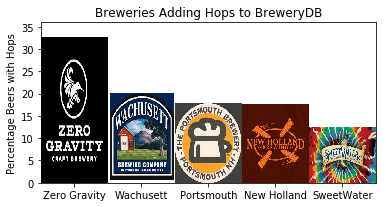

In [88]:
print(hops_per.index)
image_hop = [zero, wach, port, nH, sweet]
image_plot(hops_per[0:5].values,image_hop,width =15)
plt.xticks(np.arange(7.5,15*5+7.5,15),hops_per[0:5].index)
plt.ylabel('Percentage Beers with Hops')
plt.title('Breweries Adding Hops to BreweryDB')
plt.savefig('Images/hops.png')

Index(['Zero Gravity', 'New Holland', 'Anheuser-Busch', 'Wachusett',
       'Portsmouth', 'SweetWater', 'Guinness', 'Breckenridge', 'Sierra Nevada',
       'Oskar', 'Lagunitas', 'Miller', 'Last', 'Jackalope', 'Dock',
       'Brouwerij', 'Laughing Dog'],
      dtype='object', name='short_name')


(0, 1)

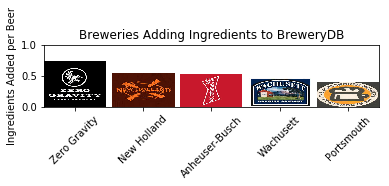

In [97]:
print(ing_per.index)
image_ing = [zero, nH,inbev,wach,port]
image_plot(ing_per[0:5].values,image_ing,width =1,spacing =.1)
plt.xticks(np.arange(.5,1.1*5+.5,1.1),ing_per[0:5].index,rotation =45)
plt.ylabel('Ingredients Added per Beer')
plt.title('Breweries Adding Ingredients to BreweryDB')
plt.savefig('Images/ing.png')
plt.ylim(0,1)

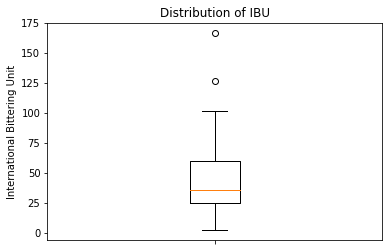

In [163]:
# Create box plot
plt.boxplot(beer_data[beer_data['ibu'].notna()]['ibu'])
plt.title('Distribution of IBU')
plt.ylabel('International Bittering Unit')
plt.xticks([1],[''])
plt.savefig('Images/dist_ibu.png')

In [125]:
bins = [0, np.percentile(beer_data[beer_data['ibu'].notna()]['ibu'],25), np.percentile(beer_data[beer_data['ibu'].notna()]['ibu'],50),
            np.percentile(beer_data[beer_data['ibu'].notna()]['ibu'],75),101]

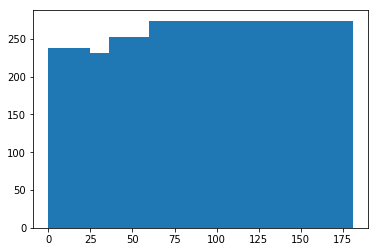

In [121]:
den = plt.hist(beer_data[beer_data['ibu'].notna()]['ibu'],bins=bins)


In [47]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of


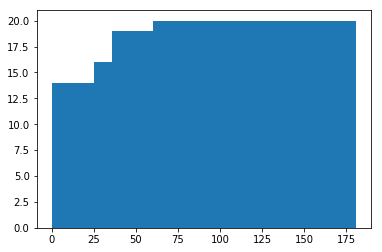

In [122]:
num = plt.hist(beer_data[beer_data['hops'].notna()& beer_data['ibu'].notna()]['ibu'],bins=bins)

In [126]:
frac_hop = num[0]/den[0]
frac_hop

center = [(bins[i] + bins[i+1])/2 for i in np.arange(len(bins)-1)]
center

[12.5, 30.5, 48.0, 80.5]

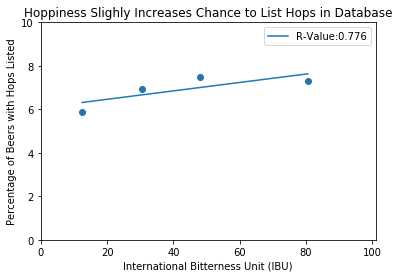

In [164]:
sun = plt.subplot()
hop_plot = plt.scatter(center,frac_hop*100)
plt.xlim(0,101)
plt.ylim(0,10)
plt.xlabel('International Bitterness Unit (IBU)')
plt.ylabel('Percentage of Beers with Hops Listed')
plt.title('Hoppiness Slighly Increases Chance to List Hops in Database')
lin = linregress(center,frac_hop)
plt.plot(center,[100*(lin[0]*el +lin[1]) for el in center],label='R-Value:' + str(round(lin[2],3)))
plt.legend()
plt.savefig('Images/ibu_regress.png')

In [158]:
lin

LinregressResult(slope=0.00019356025116826236, intercept=0.060745882639913255, rvalue=0.7757114636096988, pvalue=0.22428853639030122, stderr=0.00011135012457584894)